In [1]:
from getdist import loadMCSamples, plots
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Bayes factors for LCDM+$\Omega_K$ vs LCDM using Planck+DESI data. 
For nested models the Savage-Dickey density ratio provides a way to calculate the Bayesian evidence (or log Bayes-factors). It is given by

$$\text{BF}_{01} = \frac{p(\theta_0 | \text{data}, \mathcal{M}_1)}{p(\theta_0 | \mathcal{M}_1)}$$

where:
- $\text{BF}_{01}$ is the Bayes factor comparing model $\mathcal{M}_0$ (LCDM, $\Omega_K = 0$) to model $\mathcal{M}_1$ (LCDM+$\Omega_K$)
- $p(\theta_0 | \text{data}, \mathcal{M}_1)$ is the posterior density of parameter $\theta$ at the null value $\theta_0$ under the extended model
- $p(\theta_0 | \mathcal{M}_1)$ is the prior density at the null value under the extended model
- For our case: $\theta = \Omega_K$ and $\theta_0 = 0$

In [2]:
samples = loadMCSamples("./cosmo_input/chains/Planck_DESI_LCDM_MCMC_Omk")
omega_k_param = 'omk'
param_names = samples.getParamNames().list()
param_index = param_names.index(omega_k_param)
omega_k_samples = samples.samples[:, param_index]
param_ranges = samples.ranges    
# Get bounds using getLower and getUpper methods
lower = param_ranges.getLower(omega_k_param)
upper = param_ranges.getUpper(omega_k_param)
print(lower, upper)

-0.005 0.01


In [3]:
# Scipy.stats method
kde = gaussian_kde(omega_k_samples,bw_method='scott')
#check posterior is normalised
normalization_factor = kde.integrate_box_1d(lower, upper)
print(f"Normalization Factor: {normalization_factor:.4f}")

# Evaluate the posterior density at Omega_k = 0
posterior_at_0 = kde.evaluate(0)[0]
print(f"Estimated Posterior Density at Ωk=0: {posterior_at_0:.4f}")
prior_at_0 = 1 / (upper - lower)
savage_dickey_ratio = posterior_at_0 / prior_at_0
print(f"Savage-Dickey Ratio at Ωk=0: {savage_dickey_ratio:.4f}")
print(f"Log Bayes Factor: {np.log(savage_dickey_ratio):.4f}")

Normalization Factor: 1.0000
Estimated Posterior Density at Ωk=0: 97.0856
Savage-Dickey Ratio at Ωk=0: 1.4563
Log Bayes Factor: 0.3759


In [4]:
# #Sklearn method
# kde = KernelDensity(kernel='gaussian', bandwidth='scott')
# kde.fit(omega_k_samples[:, None])
# # get normalisation
# grid = np.linspace(lower, upper, 1000)[:, None]
# norm = np.trapz(np.exp(kde.score_samples(grid)), x=grid[:, 0])
# print(norm)
# posterior_at_0 = np.exp(kde.score_samples(np.zeros((1,1))))[0] / norm
# print(f"Estimated Posterior Density at Ωk=0: {posterior_at_0:.4f}")
# savage_dickey_ratio = posterior_at_0 / prior_at_0
# print(f"Savage-Dickey Ratio at Ωk=0: {savage_dickey_ratio:.4f}")
# print(f"Log Bayes Factor at Ωk=0: {np.log(savage_dickey_ratio):.4f}")

#### Same for $w_0w_a$-CDM model with Planck+DESI+Union3

In [8]:
samples = loadMCSamples("./cosmo_input/chains/union3_CPL",settings={'ignore_rows': 0.4})
params = ['w','wa']
param_names = samples.getParamNames().list()
param_indices = [param_names.index(param) for param in params]
w0wa_samples = samples.samples[:, param_indices]
print(w0wa_samples.shape)
param_ranges = samples.ranges    
# Get bounds using getLower and getUpper methods
lower = np.array([param_ranges.getLower(param) for param in params])
upper = np.array([param_ranges.getUpper(param) for param in params])
print(lower, upper)
print(np.mean(w0wa_samples, axis=0))

./cosmo_input/chains/union3_CPL.3.txt
./cosmo_input/chains/union3_CPL.2.txt
./cosmo_input/chains/union3_CPL.1.txt
./cosmo_input/chains/union3_CPL.4.txt
Removed 0.4 as burn in
(45636, 2)
[-1.4 -2. ] [-0.4  0.5]
[-0.67118831 -1.06594703]


(-2.0, 0.4)

<Figure size 600x450 with 0 Axes>

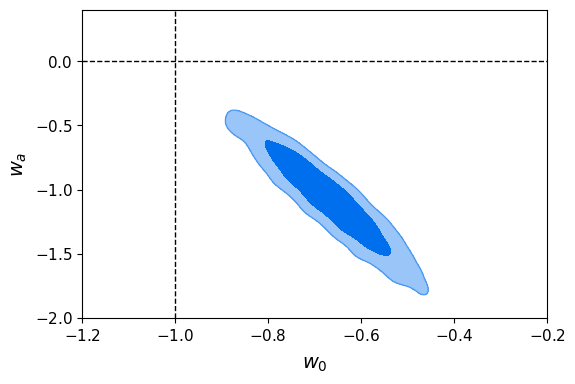

In [13]:
g = plots.get_single_plotter()
fig,ax = plt.subplots(figsize=(6,4))
ax.axhline(0, color='k', linestyle='--', lw=1)
ax.axvline(-1, color='k', linestyle='--', lw=1)
g.plot_2d(samples, params[0], params[1], filled=True, contours=True,ax=ax)
ax.set_xlim(-1.2,-0.2)
ax.set_ylim(-2,0.4)

In [14]:
kde = gaussian_kde(w0wa_samples.T,bw_method='scott')
# check normalisation
norm = np.sum(kde.integrate_box(lower, upper))
print(f"Normalisation constant: {norm:.4f}")

lcdm_point = np.array([ -1.0, 0.0])
posterior_at_0 = kde.evaluate(lcdm_point).item()
print(f"Estimated Posterior Density at w0=-1, wa=0: {posterior_at_0:.4f}")
prior_at_0 = 1 / np.prod(upper-lower)
savage_dickey_ratio = posterior_at_0 / prior_at_0
print(f"Savage-Dickey Ratio at w0=-1, wa=0: {savage_dickey_ratio:.4f}")
print(f"Log Bayes factor: {np.log(savage_dickey_ratio):.4f}")

Normalisation constant: 0.9997
Estimated Posterior Density at w0=-1, wa=0: 0.0007
Savage-Dickey Ratio at w0=-1, wa=0: 0.0018
Log Bayes factor: -6.3072
